# Titanic Competition

## 1. Goal description

**Goal**:

* Build model, to classify if titanic's passenger would survive / not survive
* Undestand relation between passenger features and survival status
* Compare different classification models and find one with best performance vs. complication ration

**Evaluation**:

* Supervised machine learning model will be used

* **Models**:
    * Naive Bayes classifier
    * K-nearest neighbors
    * Logistic regression
    * Linear discriminant analysis
    * Quadratic discriminant analysis
    * Decision tree
    * Random forest

* **Metrics**:
    * Precision
    * Recall
    * F1-metric
    * ROC-AUC 
    * Training time
    * Testing time
    * Accuracy

* **Technics**:
    * Forward selection
    * Cross validation
    * Grid search

## 2. Data collection

**Data**:

* Publicy available dataset from Kaggle competition
* Already divided into train and test set
* Contains information about passengers and their survival status
* Number of train observations: $891$
* Number of train columns: $12$
* Dependent variable: `Survived`

**Features**:

* `PassengerId`
* `Survival`
* `Pclass` - ticket class
* `Name`
* `Sex`
* `Age` - in years	
* `SibSp` - number of siblings / spouses aboard the Titanic	
* `Parch`	- number of parents / children aboard the Titanic	
* `Ticket` - ticket number	
* `Fare`
* `Cabin` - cabin number
* `Embarked` - port of embarkation

**Source**: https://www.kaggle.com/c/titanic/overview

In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [19]:
train = pd.read_csv("data/train.csv")

In [20]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train.shape

(891, 12)

# 3. Data review

## 3.1 General analysis

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
train.select_dtypes(["int64", "float64"]).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
train.select_dtypes(["object"]).describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [26]:
train.select_dtypes(["int64", "float64"]).agg(["skew", "kurtosis"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
skew,0.0,0.478523,-0.630548,0.389108,3.695352,2.749117,4.787317
kurtosis,-1.2,-1.775005,-1.280015,0.178274,17.880420,9.778125,33.398141


In [27]:
for col in train.columns:
    print(f"Columns: {col}\n{train[col].value_counts()}\n")

Columns: PassengerId
PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

Columns: Survived
Survived
0    549
1    342
Name: count, dtype: int64

Columns: Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Columns: Name
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

Columns: Sex
Sex
male      577
female    314
Name: count, dtype: int64

Columns: Age
Age
24.00    30
22.00    27
1

In [28]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3.2 Visual analysis

### 3.2.1 Survived analysis

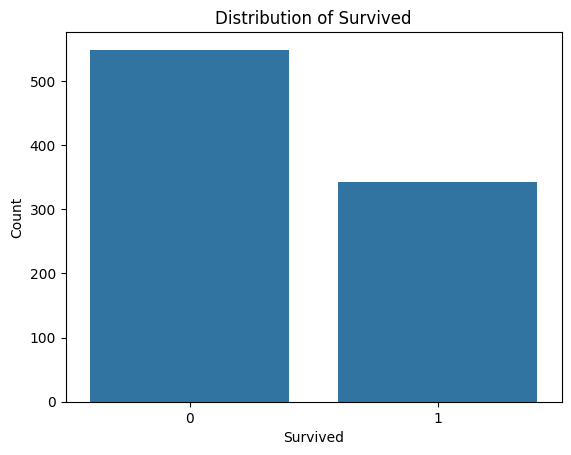

In [33]:
survival = train["Survived"].value_counts()

sns.barplot(
    x=survival.index,
    y=survival.values
)
plt.title("Distribution of Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

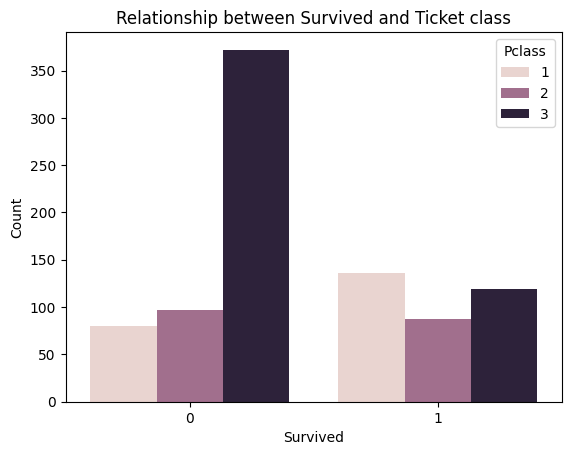

In [46]:
sns.countplot(
    data=train,
    x="Survived",
    hue="Pclass"
)
plt.title("Relationship between Survived and Ticket class")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

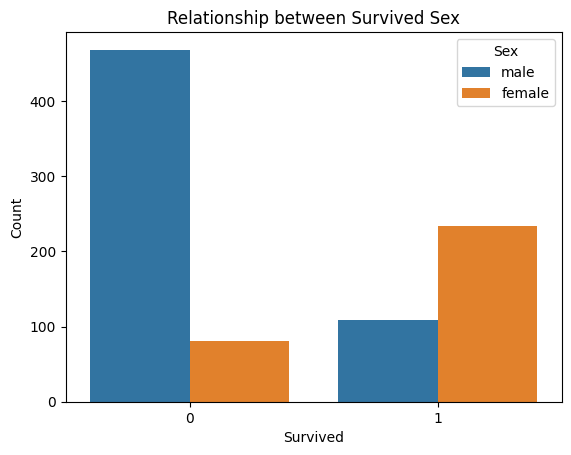

In [ ]:
sns.countplot(
    data=train,
    x="Survived",
    hue="Sex"
)
plt.title("Relationship between Survived and Sex")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

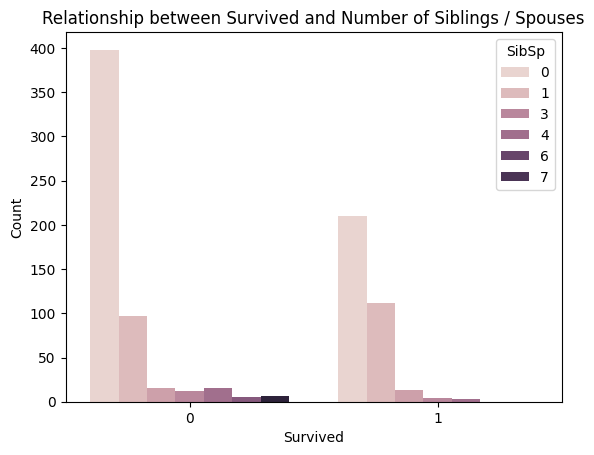

In [42]:
sns.countplot(
    data=train,
    x="Survived",
    hue="SibSp"
)
plt.title("Relationship between Survived and Number of Siblings / Spouses")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

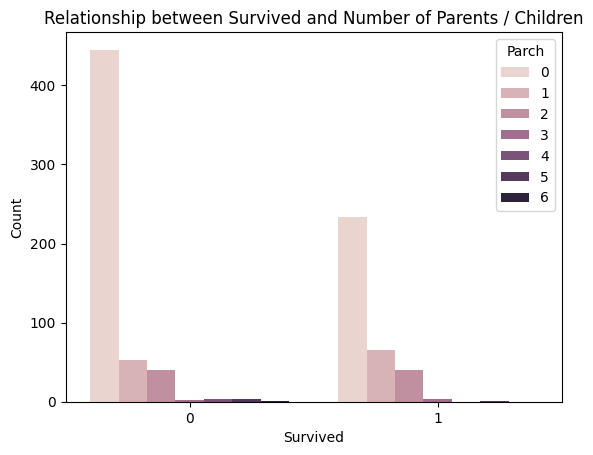

In [41]:
sns.countplot(
    data=train,
    x="Survived",
    hue="Parch"
)
plt.title("Relationship between Survived and Number of Parents / Children")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

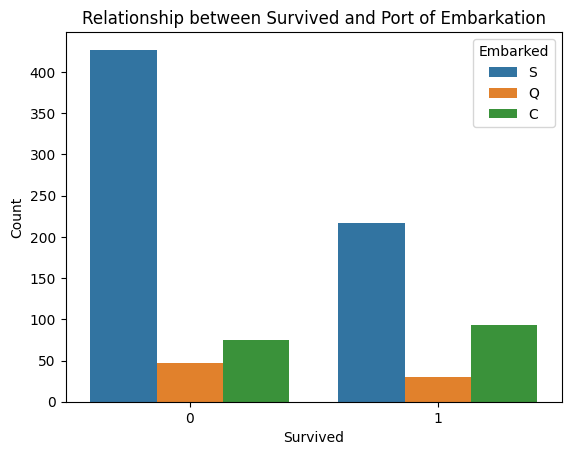

In [43]:
sns.countplot(
    data=train,
    x="Survived",
    hue="Embarked"
)
plt.title("Relationship between Survived and Port of Embarkation")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

### 3.2.2 Ticket class analysis

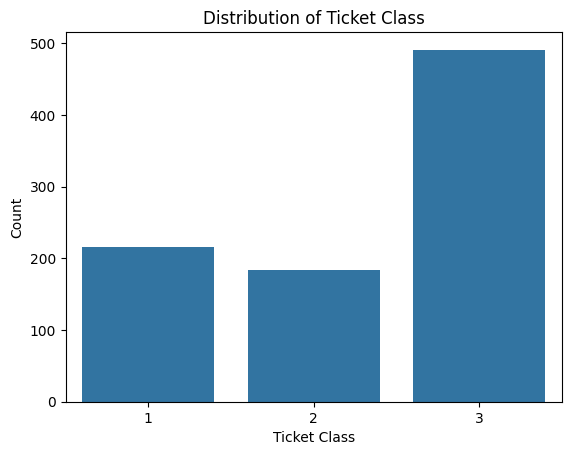

In [47]:
survival = train["Pclass"].value_counts()

sns.barplot(
    x=survival.index,
    y=survival.values
)
plt.title("Distribution of Ticket Class")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

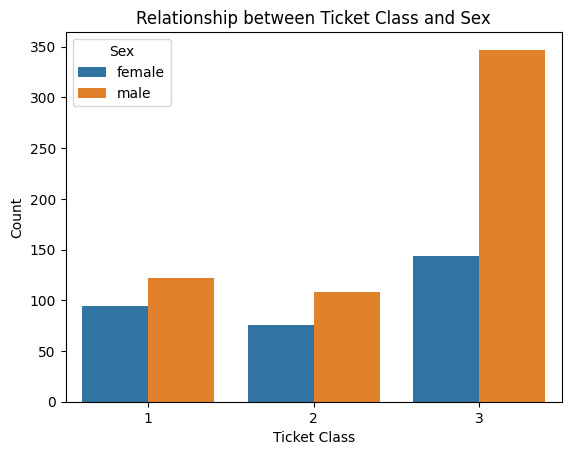

In [48]:
sns.countplot(
    data=train,
    x="Pclass",
    hue="Sex"
)
plt.title("Relationship between Ticket Class and Sex")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

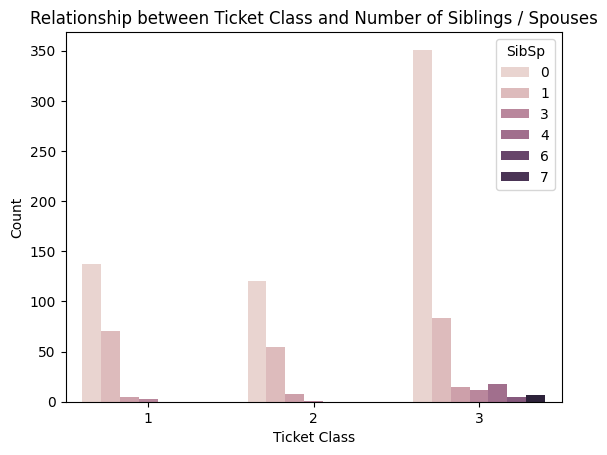

In [50]:
sns.countplot(
    data=train,
    x="Pclass",
    hue="SibSp"
)
plt.title("Relationship between Ticket Class and Number of Siblings / Spouses")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

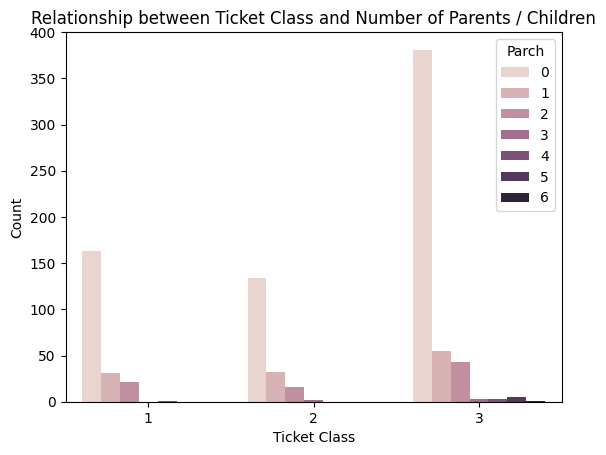

In [51]:
sns.countplot(
    data=train,
    x="Pclass",
    hue="Parch"
)
plt.title("Relationship between Ticket Class and Number of Parents / Children")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

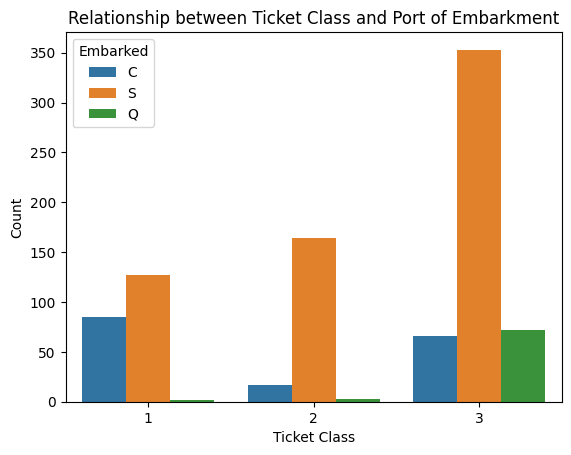

In [52]:
sns.countplot(
    data=train,
    x="Pclass",
    hue="Embarked"
)
plt.title("Relationship between Ticket Class and Port of Embarkment")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

### 3.2.3 Sex analysis

# 4. Data preparation

# 5. Data modeling

# 6. Evaluation

# 7. Findings